# Token2Wave

In [5]:
#%pip install https://download.pytorch.org/whl/cpu/torch-1.0.1-cp36-cp36m-win_amd64.whl
#%pip install torchvision

In [ ]:
# Imports
import numpy as np
import torch
import torch.nn as nn
import random
import typing

In [ ]:
sentence = "Hello World. What a wonderful day"

## Prepare Embedding

A matrix in which each row is the numerical representation of a token (word). This could come from a pre-trained model like BERT or could simply be random initializations.

- batch size: number of text samples (e.g. 2 sentences).
- sequence length: Number of tokens per sentence (e.g. 5 words per sentence).
- embedding dimension: Dimension of the numerical vector space for each token (e.g. 8 features).

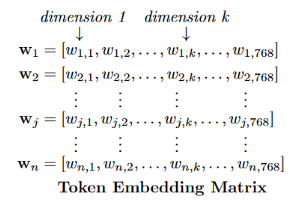

In [25]:
# Create a random vocabulary
vocab_size = 10000
embedding_dim = 768
seq_len = 10 
random.seed(42)

# Generate a simulated vocabulary
vocab = {f"word_{i}": i for i in range(vocab_size)}  # Simulated vocab

# Tokenize a sentence
def tokenize(sentence, vocab):
    # Split the sentence into words (basic tokenization)
    tokens = sentence.lower().split()
    # Convert words to indices based on the vocabulary
    token_ids = [vocab.get(word, random.randint(0, vocab_size - 1)) for word in tokens]
    return token_ids

# Example sentence
sentence = "Hello World What a wonderful day"
token_ids = tokenize(sentence, vocab)
print("Token IDs: ", token_ids, "\nSentence: ", sentence)

Token IDs:  [1824, 409, 4506, 4012, 3657, 2286] 
Sentence:  Hello World What a wonderful day


In [29]:
# Map token IDs to random embeddings
# Initialize the embedding layer
embedding_layer = torch.nn.Embedding(vocab_size, embedding_dim)

# Convert token IDs to tensor and generate embeddings
token_ids_tensor = torch.tensor([token_ids])  # Batch size 1
embeddings = embedding_layer(token_ids_tensor)

# Show
print("Embeddings shape (Batch, Token, Dimension):", embeddings.shape, "\nEmbeddings: ", embeddings)

Embeddings shape (Batch, Token, Dimension): torch.Size([1, 6, 768]) 
Embeddings:  tensor([[[-0.4103, -0.2477, -0.5205,  ..., -0.7637, -0.1894,  0.2293],
         [ 1.6210, -0.7561,  1.6339,  ..., -0.3459, -0.5091, -0.3469],
         [-1.1129, -1.1123, -0.3694,  ...,  1.1106, -0.9812,  0.4456],
         [ 1.7073,  2.1820,  0.5554,  ..., -0.3580, -0.6241,  1.0946],
         [-0.0928,  1.1434,  0.0892,  ...,  1.4508, -0.4931, -0.8383],
         [ 0.5637,  0.1400, -0.9458,  ...,  1.1358,  1.1309,  1.9844]]],
       grad_fn=<EmbeddingBackward0>)


## Calculate globale magnitude (G)

The global magnitude represents the semantics of the entire text. It is calculated from the token embeddings by summing the L2 norm over all tokens.

Formular: 

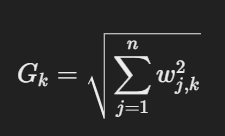

Result: 

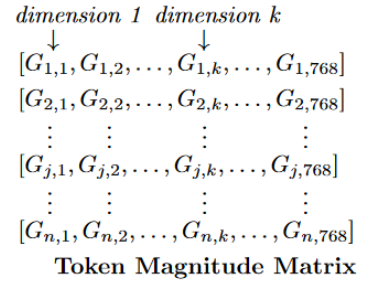

In [30]:
# Get the magnitude per word embedding
global_magnitudes = torch.norm(embeddings, dim=1)

# Show
print("Global Magnitude (G):", global_magnitudes)

Global Magnitude (G): tensor([[2.6973, 2.8210, 2.0707, 2.9162, 2.2117, 1.9128, 1.4902, 3.3517, 1.4371,
         2.1597, 2.9921, 2.3940, 2.3246, 0.8852, 2.4373, 1.4652, 2.8682, 3.5272,
         3.5009, 2.3121, 3.2266, 2.4977, 1.1594, 2.1331, 1.9308, 1.9205, 2.8040,
         2.9735, 2.5637, 2.7741, 2.9868, 2.5963, 2.6976, 1.7806, 2.3154, 1.4161,
         2.7260, 3.5042, 2.3750, 1.1655, 3.0488, 0.9876, 1.2672, 2.3070, 3.0055,
         2.1421, 2.3099, 3.1541, 2.3292, 2.9889, 2.1504, 1.1048, 0.9450, 1.5355,
         3.8002, 2.4415, 1.2134, 2.9461, 2.4258, 2.0205, 3.2629, 2.5246, 1.5971,
         2.4436, 2.9342, 3.4115, 1.5921, 1.9051, 1.5879, 1.9249, 2.8897, 1.3634,
         1.2566, 2.0426, 2.5937, 1.1344, 4.2095, 2.6048, 2.5660, 3.3532, 2.9426,
         2.0831, 2.0703, 2.8677, 2.3353, 3.5736, 3.2861, 2.4425, 2.3909, 1.6710,
         2.3365, 3.1200, 1.9714, 3.6087, 3.0272, 1.5416, 1.8244, 1.2984, 1.3518,
         3.9636, 2.7092, 3.6989, 2.0864, 2.0762, 1.7576, 1.9508, 2.7671, 3.5564,
      

## Calculate local phase angle

The phase angle describes the relationship of a token to global semantics. It is calculated individually for each dimension of each token.

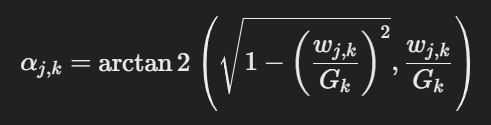

In [31]:
# To avoid division by zero
epsilon = 1e-8

# Normalize embedding
normalized_embeddings = embeddings / (global_magnitudes.unsqueeze(1) + epsilon)

# Get the local phase angle
phase_angles = torch.atan2(torch.sqrt(1 - normalized_embeddings**2), normalized_embeddings)

# Show
print("Phase angle (α):", phase_angles)

Phase angle (α): tensor([[[1.7235, 1.6587, 1.8249,  ..., 1.9038, 1.6774, 1.4786],
         [0.9261, 1.8421, 0.6615,  ..., 1.7194, 1.8608, 1.7105],
         [1.9961, 1.9761, 1.7501,  ..., 1.0755, 2.1545, 1.3910],
         [0.8854, 0.6865, 1.2992,  ..., 1.7246, 1.9289, 1.1160],
         [1.6052, 1.1535, 1.5277,  ..., 0.9009, 1.8515, 1.9139],
         [1.3603, 1.5212, 2.0451,  ..., 1.0632, 0.8825, 0.6497]]],
       grad_fn=<Atan2Backward0>)


## Calculate the complex vektor

The combination of magnitude and phase is represented as a complex vector:

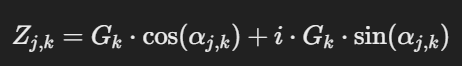


This is expressed using Euler's formula in order to be able to represent it in a Cartesian coordinate system:

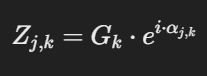

In [34]:
real_part = global_magnitudes.unsqueeze(1) * torch.cos(phase_angles)
imaginary_part = global_magnitudes.unsqueeze(1) * torch.sin(phase_angles)
Z = torch.complex(real_part, imaginary_part)

# Show
print("complex vectors (Z):", Z)

complex vectors (Z): tensor([[[-0.4103+2.6659j, -0.2477+2.8101j, -0.5205+2.0042j,  ...,
          -0.7637+2.2082j, -0.1894+1.7702j,  0.2293+2.4815j],
         [ 1.6210+2.1559j, -0.7561+2.7178j,  1.6339+1.2721j,  ...,
          -0.3459+2.3108j, -0.5091+1.7059j, -0.3469+2.4678j],
         [-1.1129+2.4570j, -1.1123+2.5925j, -0.3694+2.0375j,  ...,
           1.1106+2.0557j, -0.9812+1.4855j,  0.4456+2.4519j],
         [ 1.7073+2.0883j,  2.1820+1.7881j,  0.5554+1.9948j,  ...,
          -0.3580+2.3090j, -0.6241+1.6673j,  1.0946+2.2388j],
         [-0.0928+2.6957j,  1.1434+2.5789j,  0.0892+2.0688j,  ...,
           1.4508+1.8315j, -0.4931+1.7106j, -0.8383+2.3468j],
         [ 0.5637+2.6378j,  0.1400+2.8176j, -0.9458+1.8421j,  ...,
           1.1358+2.0419j,  1.1309+1.3749j,  1.9844+1.5075j]]],
       grad_fn=<ComplexBackward0>)


## All in one function


In [35]:
def sentence_to_complex_vectors(sentence: str,
                                vocab: dict,
                                vocab_size: int =10000,
                                embedding_dim: int =768,
                                epsilon: float =1e-8) -> torch.Tensor:
    """
    Convert a sentence into complex vectors using random embeddings.

    Args:
        sentence: Input sentence to process.
        vocab: Simulated vocabulary mapping words to indices.
        vocab_size: Size of the simulated vocabulary.
        embedding_dim: Dimension of the embedding vectors.
        epsilon: Small value to avoid division by zero.

    Returns:
        complex_vectors: Complex vectors representing the tokens in the sentence.
    """
    # Tokenize the sentence
    tokens = sentence.lower().split()
    token_ids = [vocab.get(word, random.randint(0, vocab_size - 1)) for word in tokens]

    # Map token IDs to random embeddings
    embedding_layer = torch.nn.Embedding(vocab_size, embedding_dim)
    token_ids_tensor = torch.tensor([token_ids])  # Batch size 1
    embeddings = embedding_layer(token_ids_tensor)

    # Compute global magnitudes
    global_magnitudes = torch.norm(embeddings, dim=1)  # L2 norm along sequence length

    # Normalize embeddings
    normalized_embeddings = embeddings / (global_magnitudes.unsqueeze(1) + epsilon)

    # Compute phase angles
    phase_angles = torch.atan2(torch.sqrt(1 - normalized_embeddings**2), normalized_embeddings)

    # Create complex vectors
    real_part = global_magnitudes.unsqueeze(1) * torch.cos(phase_angles)
    imaginary_part = global_magnitudes.unsqueeze(1) * torch.sin(phase_angles)
    complex_vectors = torch.complex(real_part, imaginary_part)

    return complex_vectors


In [36]:
# Example vocablurary
vocab_size = 10000
random.seed(42)

vocab = {f"word_{i}": i for i in range(vocab_size)}

In [40]:
sentence_1 = "Hello World. What a wonderful day"
sentence_2 = "yesturday it was very rainy today "

In [41]:
z_1 = sentence_to_complex_vectors(sentence=sentence_1,
                                  vocab=vocab)
z_2 = sentence_to_complex_vectors(sentence=sentence_2,
                                  vocab=vocab)

## Wellenmodulation

Changing the properties of a carrier wave (e.g. amplitude or phase) based on an input wave to transmit information. It allows the signal strength or phase to be modulated so that more information can be encoded.

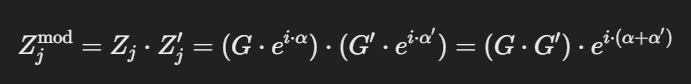

In [42]:
# Modulation through multiplication
Z_mod = z_1 * z_2

# Extract real and imaginary part
real_part_mod = Z_mod.real
imag_part_mod = Z_mod.imag

# Show
print("Modulated complex vector (Z_mod):", Z_mod)
print("Real part:", real_part_mod)
print("Imaginary part:", imag_part_mod)

Modulated complex vector (Z_mod): tensor([[[-3.5115+0.5917j, -1.2440+1.2533j, -4.7080-2.4772j,  ...,
          -2.0332+1.2210j, -4.0489-4.4215j, -3.9756-1.2068j],
         [-3.4943+0.6863j, -1.7184-0.4066j, -4.1778+3.2936j,  ...,
          -1.7922+1.5534j, -5.9709+0.5394j, -4.1307+0.4461j],
         [-1.1992-3.3530j, -0.8334-1.5569j, -3.6274+3.8914j,  ...,
          -1.7514+1.5992j, -2.2990+5.5369j, -3.7818-1.7204j],
         [-1.1941-3.3548j, -1.6210-0.7006j, -5.2035-1.1068j,  ...,
          -2.2350-0.7935j, -5.9558+0.6864j, -4.0715+0.8276j],
         [-3.3805+1.1193j, -1.2554-1.2419j, -4.5521+2.7531j,  ...,
          -2.2136-0.8516j, -5.9943-0.1071j, -3.9782-1.1982j],
         [-3.2892+1.3646j, -1.7455+0.2674j, -3.3173-4.1590j,  ...,
          -1.5634-1.7835j, -4.6496-3.7848j, -2.8941+2.9809j]]],
       grad_fn=<MulBackward0>)
Real part: tensor([[[-3.5115, -1.2440, -4.7080,  ..., -2.0332, -4.0489, -3.9756],
         [-3.4943, -1.7184, -4.1778,  ..., -1.7922, -5.9709, -4.1307],
      

In [44]:
# Only for first token
Z_mod_single = z_1[:, 0, :] * z_2[:, 0, :]

real_part_mod_single = Z_mod_single.real
imag_part_mod_single = Z_mod_single.imag

# Show
print("Modulated complex vector (Z_mod):", Z_mod_single)
print("Real part:", real_part_mod_single)
print("Imaginary part:", imag_part_mod_single)

Modulated complex vector (Z_mod): tensor([[ -3.5115+5.9174e-01j,  -1.2440+1.2533e+00j,  -4.7080-2.4772e+00j,
          -5.2971-1.9133e+00j,  -2.2650-1.0604e+00j,  -4.8326+2.9045e+00j,
          -2.6323-1.9305e+00j,  -2.6431+1.2492e+00j,  -6.4413-3.5015e+00j,
          -2.9122+4.5083e-01j,  -6.2948-2.3410e-01j,  -4.9296-4.3599e+00j,
           0.0901+4.3050e+00j,  -5.0110-1.8812e+00j,  -2.3519-5.3435e+00j,
          -5.3570+5.9559e+00j,  -1.3618-1.0519e+00j,  -5.1146-3.3527e+00j,
          -6.8121+2.3287e+00j,  -5.3613+4.5980e+00j,  -1.2721-3.0327e+00j,
          -7.5043-3.3699e+00j,  -7.0540+1.6215e+00j,  -1.1170+4.2405e+00j,
          -4.6631+3.4510e+00j,  -2.1986-3.2186e-01j,  -7.5400-2.2512e+00j,
          -2.6741-4.5327e-01j,  -3.0406-6.0965e-01j, -11.9990-2.2437e+00j,
          -4.4131+2.5422e+00j,  -2.2708-1.9016e+00j,  -6.1555+4.8377e-01j,
          -6.3438-3.1771e+00j,  -4.0138+4.9095e+00j,  -2.5923-5.8690e+00j,
          -1.7563-4.4958e+00j,  -6.5785+4.9682e-02j,  -5.1705+2.30

## Calculate Wave inverence

Combination of two or more waves, whereby they strengthen (constructive interference) or cancel each other (destructive interference). It is used to understand the interactions between waves and to analyze how different signals influence each other.

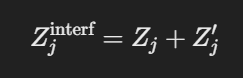

In [48]:
def wave_interference(Z: torch.Tensor,
                      Z_prime: torch.Tensor) -> torch.Tensor:
    """Perform wave interference by adding two complex vectors.

    Args:
        Z: first complex vector
        Z_prime: second complex vector

    Returns:
        Z_interference: interference of 2 complex vectors
    """
    # Add real part
    real_part_interference = Z.real + Z_prime.real
    
    # Add imaginary part
    imag_part_interference = Z.imag + Z_prime.imag
    
    # Combine both to a complex vector
    Z_interference = torch.complex(real_part_interference, imag_part_interference)
    
    return Z_interference


In [49]:
Z_interference = wave_interference(z_1, z_2)

# Show
print("Shape of interferent vecotrs:", Z_interference)

Shape of interferent vecotrs: tensor([[[ 0.9990+3.6650j,  1.2132+2.2899j, -0.9853+4.6496j,  ...,
           0.9326+2.9859j, -2.0451+4.7697j, -0.3669+4.0329j],
         [ 0.2255+4.0910j, -0.2110+2.7105j,  1.7768+4.3501j,  ...,
           1.1806+2.9029j,  0.6987+4.9647j,  0.4210+4.0563j],
         [-2.2598+3.4281j, -1.2079+2.3694j,  2.1706+4.0432j,  ...,
           0.4545+2.4209j,  2.2688+4.3964j, -1.0503+3.9539j],
         [-2.5204+3.2207j, -0.5034+2.6937j,  0.0851+4.3696j,  ...,
          -0.6059+3.0839j,  0.9749+4.6902j, -0.4217+2.7560j],
         [ 0.2113+3.9920j, -1.0365+2.5445j,  0.7162+4.3915j,  ...,
          -0.7686+2.8998j, -0.0989+5.1885j, -0.7550+4.0482j],
         [ 0.7726+4.0423j,  0.5249+2.3562j, -2.0670+4.3176j,  ...,
          -1.3288+2.8637j, -2.2510+4.2290j,  1.6419+3.8404j]]],
       grad_fn=<ComplexBackward0>)


In [50]:
def analyze_interference(Z: torch.Tensor,
                         Z_prime: torch.Tensor) -> torch.Tensor:
    """
    Analyze the interference of vectors Z and Z' based on their magnitude and phase angles.

    Args:
        Z: first complex vector
        Z_prime: second complex vector

    Returns:
        dict: Results of the analysis, including magnitude and phase differences.
    """
    # Calculate the magnitude of the input vectors
    magnitude_Z = torch.abs(Z)
    magnitude_Z_prime = torch.abs(Z_prime)
    
    # Calculate the magnitude of the interfered vector
    Z_interference = wave_interference(Z, Z_prime)
    magnitude_Z_interference = torch.abs(Z_interference)

    # Calculate the phase difference
    phase_Z = torch.angle(Z)
    phase_Z_prime = torch.angle(Z_prime)
    phase_diff = phase_Z - phase_Z_prime
    
    # Show
    analysis = {
        "Magnitude Z": magnitude_Z.mean().item(),
        "Magnitude Z'": magnitude_Z_prime.mean().item(),
        "Magnitude Interference": magnitude_Z_interference.mean().item(),
        "Phase Difference (Mean)": phase_diff.mean().item(),
        "Phase Difference (Max)": phase_diff.max().item(),
        "Phase Difference (Min)": phase_diff.min().item()
    }
    
    return analysis

- If the phase difference is small and the magnitude of the interference is greater than that of the individual vectors, the vectors have favored each other (constructive interference).

- If the phase difference is large and the magnitude of the interference is smaller, the vectors have canceled each other out (destructive interference)

In [ ]:
# Analyze
analysis_result = analyze_interference(z_1, z_2)

# Show
for key, value in analysis_result.items():
    print(f"{key}: {value}")

Magnitude Z: 2.3341662883758545
Magnitude Z': 2.356656074523926
Magnitude Interference: 4.47666072845459
Phase Difference (Mean): -0.02072008140385151
Phase Difference (Max): 2.180986166000366
Phase Difference (Min): -2.154322862625122
